In [ ]:
from google.colab import files
Files=files.upload()

Saving train.csv to train (4).csv


In [ ]:
# import pandas lib as pd
import pandas as pd

# read by default 1st sheet of an excel file
Data = pd.read_csv('train.csv')

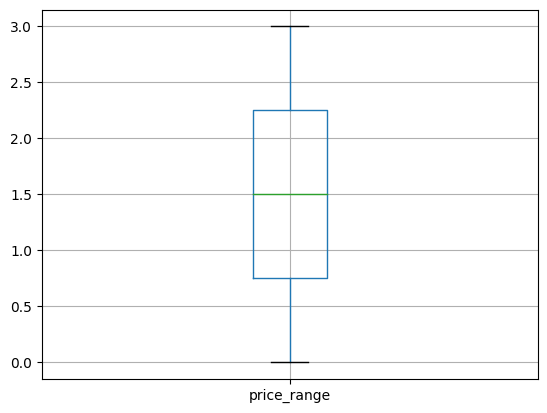

In [ ]:
import matplotlib.pyplot as plot
b_plot = Data.boxplot(column = 'price_range')
b_plot.plot()
plot.show()

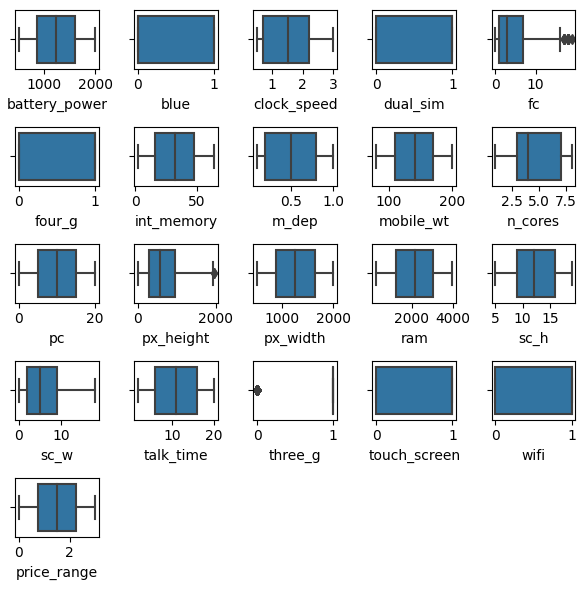

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df'


plt.figure(figsize=(6, 6))

for i, col in enumerate(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'], 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=col, data=Data)

plt.tight_layout()
plt.show()

In [ ]:
Data.head(6)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1


In [ ]:
Data=Data.dropna()


In [ ]:
Data1=Data.drop_duplicates()

In [ ]:
n=len(Data1)
print(n)

2000


In [ ]:
Data1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
Data1=Data1.reset_index()

In [ ]:
import numpy as np
Q1 = np.percentile(Data["talk_time"], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(Data["talk_time"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
UpperLimit=Q3 + 1.5*IQR
LowerLimit=Q1 - 1.5*IQR

<ipython-input-130-035c6127021d>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(Data["talk_time"], 25,
<ipython-input-130-035c6127021d>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(Data["talk_time"], 75,


In [ ]:
OutlierList=[]
for i in range (Data["talk_time"].shape[0]):
  if Data["talk_time"][i]>=UpperLimit:
    OutlierList.append(i)
  elif Data["talk_time"][i]<=LowerLimit:
    OutlierList.append(i)
print(OutlierList)

[]


In [ ]:
len(OutlierList)

0

In [ ]:
Data1=Data1.drop(OutlierList)

In [ ]:
Y1=Data['price_range']

In [ ]:
X1=Data[['battery_power', 'blue', 'clock_speed', 'dual_sim',
       'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X1,Y1,test_size=0.2, random_state=42)

In [ ]:
Data.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
from sklearn.naive_bayes import MultinomialNB
CLF_MN=MultinomialNB()
CLF_MN=CLF_MN.fit(X_train,Y_train)
Y_pred=CLF_MN.predict(X_test)
from sklearn.metrics import classification_report
Report=classification_report(Y_test,Y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       105
           1       0.41      0.42      0.42        91
           2       0.38      0.36      0.37        92
           3       0.57      0.61      0.59       112

    accuracy                           0.55       400
   macro avg       0.54      0.54      0.54       400
weighted avg       0.55      0.55      0.55       400



In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs',multi_class='multinomial')
clf.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
clf.score(X_test, Y_test)

0.6325

In [ ]:
from sklearn.metrics import accuracy_score

# Predict the classes on the test set
Y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 63.25%


In [ ]:
# import support vector classifier
# "Support Vector Classifier"
from sklearn.svm import SVC
CLF_svc = SVC()

# fitting x samples and y classes
CLF_svc=CLF_svc.fit(X_train,Y_train)
Y_pred=CLF_svc.predict(X_test)
from sklearn.metrics import classification_report
Report=classification_report(Y_test,Y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.95      0.99      0.97        91
           2       0.94      0.95      0.94        92
           3       0.98      0.95      0.96       112

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.97      0.96      0.97       400



In [ ]:
from sklearn.ensemble import RandomForestClassifier
CLF_RandFr =  RandomForestClassifier()
CLF_RandFr=CLF_RandFr.fit(X_train,Y_train)
Y_pred=CLF_RandFr.predict(X_test)
from sklearn.metrics import classification_report
Report=classification_report(Y_test,Y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       105
           1       0.85      0.86      0.85        91
           2       0.82      0.84      0.83        92
           3       0.93      0.89      0.91       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [ ]:
from sklearn.ensemble import BaggingClassifier

# Create a Decision Tree classifier
rf = RandomForestClassifier()
# Create a BaggingClassifier
model = BaggingClassifier(base_estimator=rf, n_estimators=10)

# Fit the model on the training data
classifiers = model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report
Report=classification_report(Y_test,Y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       105
           1       0.85      0.86      0.85        91
           2       0.82      0.84      0.83        92
           3       0.93      0.89      0.91       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [ ]:
from sklearn.tree import DecisionTreeClassifier
CLF_DecisionT =  DecisionTreeClassifier()
CLF_DecisionT=CLF_DecisionT.fit(X_train,Y_train)
Y_pred=CLF_RandFr.predict(X_test)
from sklearn.metrics import classification_report
Report=classification_report(Y_test,Y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       105
           1       0.90      0.86      0.88        91
           2       0.79      0.84      0.81        92
           3       0.92      0.87      0.89       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Create a Decision Tree classifier
dc = DecisionTreeClassifier()

# Split your dataset into training and testing sets


# Create a BaggingClassifier
model = BaggingClassifier(base_estimator=dc, n_estimators=10)

# Fit the model on the training data
classifiers = model.fit(X_train, Y_train)



# Make predictions on the test set
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.87


In [ ]:
from sklearn.metrics import classification_report
Report=classification_report(Y_test,Y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       105
           1       0.90      0.86      0.88        91
           2       0.79      0.84      0.81        92
           3       0.92      0.87      0.89       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400

